# CE510: Modern Statistics for Engineers

## Winter 2026 Final Project

Completed by Brandon Auyeung for Dr. Peyman Abbaszadeh.

Let us define variables.

$ S \equiv \text{suspended sediment concentration, SSC} \ \dot{=} \ [\frac{M}{L^3}]$

$ Q \equiv \text{discharge} \ \dot{=} \ [L^3]$

$\alpha, \ \beta \equiv \text{model parameters} $

$\sigma \equiv \text{unknown measurement error}$

Note: 

S in Excel file is given in mg/L. Q in Excel is given in cfs. 

1 $\text{mg/L}$ = 0.001 $\text{kg/m}^3$. 1 $\text{cfs}$ = 0.0283168 $\text{m}^3\text{/s}$ 

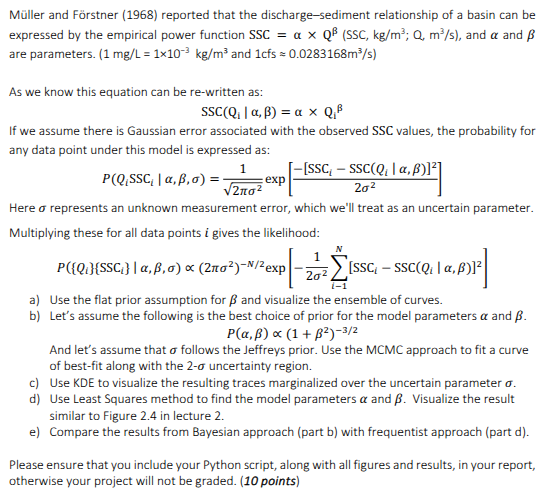

Import data

In [1]:
import numpy as np
import pandas as pd
from icecream import ic
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.optimize as opt

In [2]:
data = pd.read_excel("Data_Final_Project.xlsx", skiprows=0)
data = data.drop(["Agency","Station ID"], axis=1)
data

,Date,Suspended sediment concentration,Discharge
0,1961-10-01,4.0,327
1,1961-10-02,4.0,315
2,1961-10-03,4.0,309
3,1961-10-04,4.0,303
4,1961-10-05,4.0,294
...,...,...,...
3646,1971-09-25,1.0,444
3647,1971-09-26,2.0,485
3648,1971-09-27,4.0,554
3649,1971-09-28,4.0,623


In [4]:
data.describe()

,Date,Suspended sediment concentration,Discharge
count,3651,3587.000000,3651.000000
mean,1966-09-30 00:00:00,14.227209,4081.558203
min,1961-10-01 00:00:00,0.000000,186.000000
25%,1964-03-31 12:00:00,4.000000,655.000000
50%,1966-09-30 00:00:00,6.000000,2020.000000
75%,1969-03-30 12:00:00,16.000000,5270.000000
max,1971-09-29 00:00:00,452.000000,46500.000000
std,NaN,23.279191,5267.264166


## a) Use the flat prior assumption for $\beta$ and visualize the ensemble of curves.

$$ S(Q_i | \alpha, \ \beta) = \alpha Q_i^{\beta}$$

Assuming Gaussian error in $S_{obs}$:

$$ \mathbb{P}(Q_iS_i | \alpha, \beta, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}\left[ \frac{-[S_i - S(Q_i | \alpha, \beta)]^2}{2\sigma^2} \right]$$

$$ \mathcal{L} = \mathbb{P}(\vec{Q_i}\vec{S_i} | \alpha,  \beta,  \sigma) \propto (2\pi\sigma^2)^{-N/2}\text{exp}\left[ -\frac{1}{2\sigma^2} \sum_{i-1}^{N}[S_i - S(Q_i | \alpha, \beta)]^2\right]$$

<>:9: SyntaxWarning: "\ " is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\ "? A raw string is also an option.
<>:9: SyntaxWarning: "\ " is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\ "? A raw string is also an option.
/tmp/ipykernel_11782/385125324.py:9: SyntaxWarning: "\ " is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\ "? A raw string is also an option.
  ax.set_ylabel('$S = \\alpha Q^{\\beta} \ [kg/m^3] ; \\alpha = 1 $')


Text(0, 0.5, '$S = \\alpha Q^{\\beta} \\ [kg/m^3] ; \\alpha = 1 $')

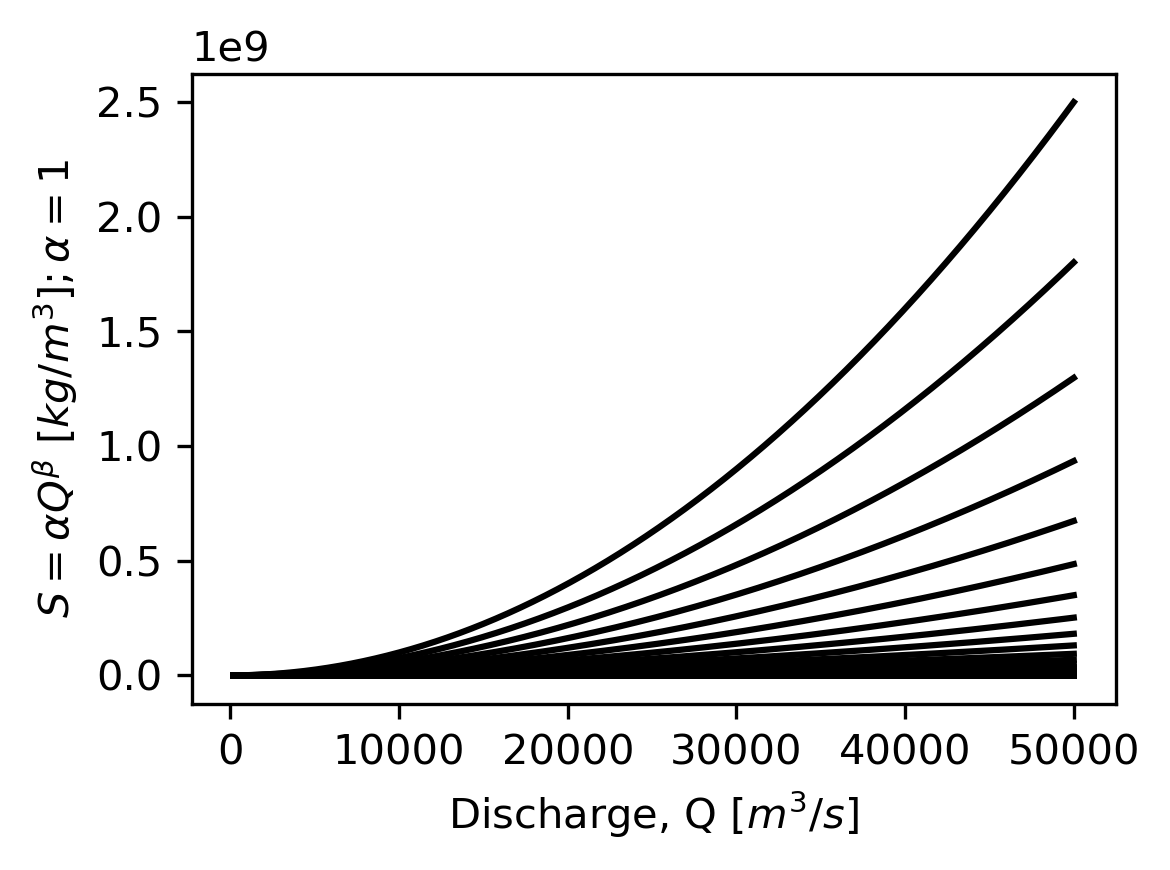

In [32]:
# beta_flat = stats.beta(1,1) # flat (uninformative) prior for beta
fig, ax = plt.subplots(figsize=(4,3), tight_layout=True, dpi=300)
Q_line = np.linspace(200, 50000, 10000) # test muliple flow rate values

for beta in np.linspace(-1, 2, 100): # with an equal probability of β values...
    ax.plot(Q_line, Q_line**beta, '-', color = "black")

ax.set_xlabel('Discharge, Q $[m^3/s]$')
ax.set_ylabel('$S = \\alpha Q^{\\beta} \ [kg/m^3] ; \\alpha = 1 $')

## 2) Use the MCMC approach to fit a curve of best-fit along with the $\pm 2 \sigma$ uncertainty region. 

Let’s assume the following is the best choice of prior for the model parameters $\alpha$ and $\beta$, as well as assuming that $\sigma$ follows the Jeffrey's prior.

$$ \mathbb{P}(\alpha, \beta) \propto (1+\beta^2)^{-3/2}$$
